In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Rotterdam Meetstation
df = pd.read_csv("rotterdam.csv")
cols = df.columns[df.dtypes.eq('float64')]
df[cols] = df[cols].fillna(0).astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23942 entries, 0 to 23941
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   STN       23942 non-null  int64
 1   YYYYMMDD  23942 non-null  int64
 2   DDVEC     23942 non-null  int64
 3   FHVEC     23942 non-null  int64
 4   FG        23942 non-null  int64
 5   FHX       23942 non-null  int64
 6   FHXH      23942 non-null  int64
 7   FHN       23942 non-null  int64
 8   FHNH      23942 non-null  int64
 9   FXX       23942 non-null  int64
 10  FXXH      23942 non-null  int64
 11  TG        23942 non-null  int64
 12  TN        23942 non-null  int64
 13  TNH       23942 non-null  int64
 14  TX        23942 non-null  int64
 15  TXH       23942 non-null  int64
 16  T10N      23942 non-null  int64
 17  T10NH     23942 non-null  int64
 18  SQ        23942 non-null  int64
 19  SP        23942 non-null  int64
 20  Q         23942 non-null  int64
 21  DR        23942 non-null  int64
 22

In [4]:
print(df)

       STN  YYYYMMDD  DDVEC  FHVEC  FG  FHX  FHXH  FHN  FHNH  FXX  ...  VVNH  \
0      344  19561001      0      0   0    0     0    0     0    0  ...     0   
1      344  19561002      0      0   0    0     0    0     0    0  ...     0   
2      344  19561003      0      0   0    0     0    0     0    0  ...     0   
3      344  19561004      0      0   0    0     0    0     0    0  ...     0   
4      344  19561005      0      0   0    0     0    0     0    0  ...     0   
...    ...       ...    ...    ...  ..  ...   ...  ...   ...  ...  ...   ...   
23937  344  20220415     61     28  30   50    17   10     1   70  ...     3   
23938  344  20220416     89     42  43   60    13   30     4  100  ...     5   
23939  344  20220417    105     36  37   50    13   30     1  100  ...     9   
23940  344  20220418    153     17  28   40     3    0    24  100  ...    23   
23941  344  20220419     58     31  34   60    17   10     1   90  ...     4   

       VVX  VVXH  NG  UG  UX  UXH  UN  

In [5]:
print(df.describe())

           STN      YYYYMMDD         DDVEC         FHVEC            FG  \
count  23942.0  2.394200e+04  23942.000000  23942.000000  23942.000000   
mean     344.0  1.989091e+07    188.493025     39.747097     44.650948   
std        0.0  1.892542e+05     98.798745     24.274346     23.964893   
min      344.0  1.956100e+07      0.000000      0.000000      0.000000   
25%      344.0  1.973022e+07    101.000000     21.000000     27.000000   
50%      344.0  1.989071e+07    210.000000     36.000000     41.000000   
75%      344.0  2.005113e+07    258.000000     54.000000     57.000000   
max      344.0  2.022042e+07    360.000000    175.000000    180.000000   

                FHX          FHXH           FHN          FHNH           FXX  \
count  23942.000000  23942.000000  23942.000000  23942.000000  23942.000000   
mean      68.021677     11.382591     19.816974      9.429162     90.345000   
std       32.082240      6.332823     19.123900      8.937286     61.699926   
min        0.0000

In [6]:
df.isnull().sum()
df.dropna

<bound method DataFrame.dropna of        STN  YYYYMMDD  DDVEC  FHVEC  FG  FHX  FHXH  FHN  FHNH  FXX  ...  VVNH  \
0      344  19561001      0      0   0    0     0    0     0    0  ...     0   
1      344  19561002      0      0   0    0     0    0     0    0  ...     0   
2      344  19561003      0      0   0    0     0    0     0    0  ...     0   
3      344  19561004      0      0   0    0     0    0     0    0  ...     0   
4      344  19561005      0      0   0    0     0    0     0    0  ...     0   
...    ...       ...    ...    ...  ..  ...   ...  ...   ...  ...  ...   ...   
23937  344  20220415     61     28  30   50    17   10     1   70  ...     3   
23938  344  20220416     89     42  43   60    13   30     4  100  ...     5   
23939  344  20220417    105     36  37   50    13   30     1  100  ...     9   
23940  344  20220418    153     17  28   40     3    0    24  100  ...    23   
23941  344  20220419     58     31  34   60    17   10     1   90  ...     4   

     

In [17]:
cr = df.corr()
cr


,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YYYYMMDD,NaN,1.000000,0.119470,0.044611,0.052847,0.068806,0.082642,0.119125,0.034942,0.543818,...,0.129671,0.418214,0.185386,0.164955,0.474940,0.512672,0.236353,0.426171,0.412341,0.557133
DDVEC,NaN,0.119470,1.000000,0.216601,0.264856,0.311565,0.064926,0.131288,0.178271,0.214307,...,0.113082,0.350293,0.091424,0.329225,0.008847,-0.009742,0.049429,0.036228,-0.042398,0.035206
FHVEC,NaN,0.044611,0.216601,1.000000,0.971501,0.848325,0.089312,0.835901,0.160957,0.566696,...,0.057705,0.287669,0.060554,0.323252,0.005347,-0.017881,0.048195,0.070865,0.012463,-0.145892
FG,NaN,0.052847,0.264856,0.971501,1.000000,0.893917,0.099858,0.840859,0.187132,0.603962,...,0.081072,0.329656,0.079575,0.366208,0.014813,-0.009462,0.061679,0.077672,0.016936,-0.151819
FHX,NaN,0.068806,0.311565,0.848325,0.893917,1.000000,0.243087,0.700503,0.218223,0.615299,...,0.128385,0.511678,0.163740,0.346232,-0.043331,-0.058564,0.028077,0.005278,-0.030309,-0.121216
FHXH,NaN,0.082642,0.064926,0.089312,0.099858,0.243087,1.000000,0.070165,-0.262640,0.132366,...,0.023550,0.321321,0.236588,0.094110,-0.050333,-0.031616,-0.160005,-0.069141,0.038079,0.069185
FHN,NaN,0.119125,0.131288,0.835901,0.840859,0.700503,0.070165,1.000000,0.070041,0.547533,...,0.076847,0.235686,0.055838,0.292651,0.097775,0.063333,0.066164,0.165856,0.079722,-0.131764
FHNH,NaN,0.034942,0.178271,0.160957,0.187132,0.218223,-0.262640,0.070041,1.000000,0.118056,...,0.208054,0.234280,0.003200,0.130322,-0.031900,-0.044095,0.245506,-0.007069,-0.071333,-0.030195
FXX,NaN,0.543818,0.214307,0.566696,0.603962,0.615299,0.132366,0.547533,0.118056,1.000000,...,0.119554,0.413350,0.110156,0.247180,0.594087,0.603519,0.283431,0.572659,0.474296,0.173924


Text(0, 0.5, 'Daily mean windspeed (in 0.1 m/s)')

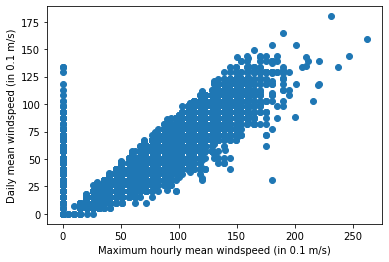

In [4]:
X = df['FHX'].values.reshape(-1,1)
y = df['FG']
Xlabel = 'Maximum hourly mean windspeed (in 0.1 m/s)'
ylabel = 'Daily mean windspeed (in 0.1 m/s)'

plt.scatter(X, y)
plt.xlabel(Xlabel)
plt.ylabel(ylabel)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

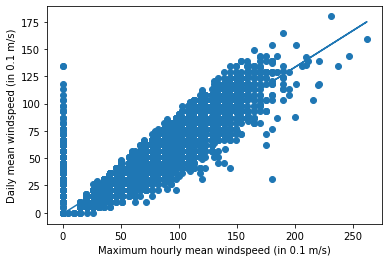

In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train))
plt.xlabel(Xlabel)
plt.ylabel(ylabel)
plt.show()

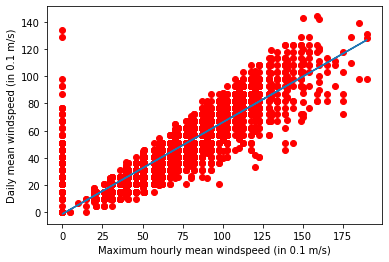

In [11]:
plt.scatter(X_test, y_test,color='r')
plt.plot(X_test, lr.predict(X_test))
plt.xlabel(Xlabel)
plt.ylabel(ylabel)
plt.show()

In [6]:
print("Score train data: " + str(round(lr.score(X_train, y_train),2)))
print("Score test data: " + str(round(lr.score(X_test, y_test),2)))

Score train data: 0.81
Score test data: 0.77


In [19]:
print(lr.predict([[50]]))

[32.52482108]


In [14]:
pickle.dump(lr, open('modelSAL.pkl','wb'))